In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from scapy.all import rdpcap, ARP
import numpy as np



c:\Users\Slyexistence\AppData\Local\Programs\Python\Python312\Lib\site-packages\scapy\layers\ipsec.py:512: CryptographyDeprecationWarning: TripleDES has been moved to cryptography.hazmat.decrepit.ciphers.algorithms.TripleDES and will be removed from this module in 48.0.0.
  cipher=algorithms.TripleDES,
c:\Users\Slyexistence\AppData\Local\Programs\Python\Python312\Lib\site-packages\scapy\layers\ipsec.py:516: CryptographyDeprecationWarning: TripleDES has been moved to cryptography.hazmat.decrepit.ciphers.algorithms.TripleDES and will be removed from this module in 48.0.0.
  cipher=algorithms.TripleDES,


      timestamp         sender_mac    sender_ip         target_mac  \
0  1.737294e+09  00:ad:24:bf:9d:52  192.168.1.1  00:00:00:00:00:00   
1  1.737294e+09  00:ad:24:bf:9d:52  192.168.1.1  00:00:00:00:00:00   
2  1.737294e+09  00:ad:24:bf:9d:52  192.168.1.1  00:00:00:00:00:00   
3  1.737294e+09  00:ad:24:bf:9d:52  192.168.1.1  00:00:00:00:00:00   
4  1.737294e+09  00:ad:24:bf:9d:52  192.168.1.1  00:00:00:00:00:00   

      target_ip  operation  label  
0  192.168.1.72          1      0  
1  192.168.1.72          1      0  
2  192.168.1.72          1      0  
3  192.168.1.15          1      0  
4  192.168.1.15          1      0  


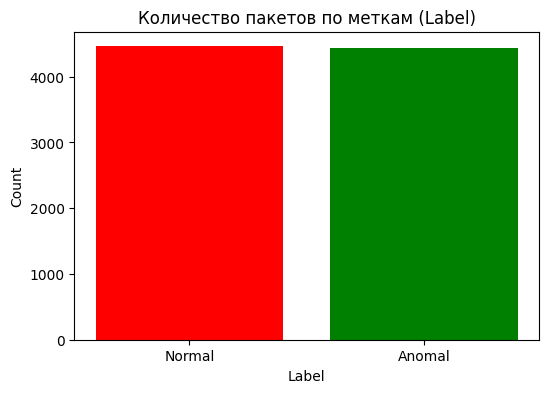

In [3]:

# Объединение нормальных и аномальных данных
df = pd.read_csv(r'D:\Проекты\Дипломаня работа\DoFitN\Code\DoFitN\data\New_data.csv')

# Вывод первых строк
print(df.head())

label_counts = df['label'].value_counts()

plt.figure(figsize=(6, 4))
plt.bar(label_counts.index, label_counts.values, color=['red', 'green'])
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Количество пакетов по меткам (Label)')
plt.xticks([0, 1], ['Normal', 'Anomal'])
plt.show()



In [20]:
df.head(2000)

,src_ip,dst_ip,src_mac,dst_mac,op_type,time_delta,label
0,192.168.1.1,192.168.1.3,00:ad:24:bf:9d:52,00:00:00:00:00:00,1,1727203120.363709,0
1,192.168.1.1,192.168.1.3,00:ad:24:bf:9d:52,00:00:00:00:00:00,1,1727203350.457558,0
2,192.168.1.1,192.168.1.83,00:ad:24:bf:9d:52,00:00:00:00:00:00,1,1727203379.749839,0
3,192.168.1.63,192.168.1.1,4c:5f:70:98:4d:bf,00:00:00:00:00:00,1,1727203400.374173,0
4,192.168.1.1,192.168.1.63,00:ad:24:bf:9d:52,4c:5f:70:98:4d:bf,2,1727203400.37531,0
...,...,...,...,...,...,...,...
1673,192.168.1.63,192.168.1.1,08:00:27:b0:a0:0d,00:ad:24:bf:9d:52,2,1727194753.34208461,1
1674,192.168.1.9,192.168.1.63,9c:2f:4e:32:19:52,4c:5f:70:98:4d:bf,2,1727194753.684211756,1
1675,192.168.1.9,192.168.1.63,9c:2f:4e:32:19:52,4c:5f:70:98:4d:bf,2,1727194753.693701135,1
1676,192.168.1.1,192.168.1.63,08:00:27:b0:a0:0d,4c:5f:70:98:4d:bf,2,1727194754.84467668,1


In [6]:
encoder = OneHotEncoder(sparse_output=False)
encoded_features = encoder.fit_transform(df[['sender_mac','sender_ip','target_mac','target_ip']])
encoded_columns = encoder.get_feature_names_out(['sender_mac','sender_ip','target_mac','target_ip'])
encoded_df = pd.DataFrame(encoded_features, columns=encoded_columns)

# Объединение с основным DataFrame и удаление исходных категориальных признаков
df = pd.concat([df[['operation', 'timestamp', 'label']], encoded_df], axis=1)

In [7]:
df.head(2000)

,operation,timestamp,label,sender_mac_00:6d:14:0d:fa:ea,sender_mac_00:ad:24:bf:9d:52,sender_mac_01:4b:0a:34:4d:b9,sender_mac_01:68:53:3f:5f:0e,sender_mac_01:d4:ff:36:01:e3,sender_mac_03:49:48:d2:dc:99,sender_mac_03:8e:48:fc:4f:bf,...,target_ip_192.168.1.85,target_ip_192.168.1.88,target_ip_192.168.1.89,target_ip_192.168.1.9,target_ip_192.168.1.90,target_ip_192.168.1.92,target_ip_192.168.1.93,target_ip_192.168.1.95,target_ip_192.168.1.97,target_ip_192.168.1.98
0,1,1.737294e+09,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,1.737294e+09,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,1.737294e+09,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,1.737294e+09,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,1.737294e+09,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1,1.737297e+09,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1996,1,1.737297e+09,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1997,1,1.737297e+09,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1998,1,1.737297e+09,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.utils import class_weight
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Масштабирование данных
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(df.drop(columns=['label']))  # Признаки

# Формирование временных последовательностей
def create_sequences(data, labels, sequence_length):
    sequences = []
    sequence_labels = []
    for i in range(len(data) - sequence_length):
        sequences.append(data[i:i + sequence_length])
        sequence_labels.append(labels[i + sequence_length])
    return np.array(sequences), np.array(sequence_labels)

sequence_length = 10  # Длина последовательности
X, y = create_sequences(scaled_features, df['label'].values, sequence_length)

# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Определение весов для классов
class_weights = class_weight.compute_class_weight(
    class_weight='balanced',  # Автоматическое вычисление весов
    classes=np.unique(y_train),  # Уникальные метки классов
    y=y_train  # Истинные метки обучающей выборки
)

# Преобразование в формат словаря для Keras
class_weights_dict = dict(enumerate(class_weights))

# Печать весов классов для проверки
print(f"Веса классов: {class_weights_dict}")

# Создание модели RNN
model = Sequential()
model.add(LSTM(64, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=False))
model.add(Dense(1, activation='sigmoid'))

# Компиляция модели
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Обучение модели с указанием весов классов
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test),
                    class_weight=class_weights_dict)

# Оценка модели
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Точность : {accuracy * 100:.2f}%")


Веса классов: {0: np.float64(0.9951969260326609), 1: np.float64(1.0048496605237633)}


c:\Users\Slyexistence\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
195/1950s - accuracy: 0.9888 - loss: 0.1590━━━━━━━━━━━━━   ━━━━━━━━━━━━━━━━━━━━3s4:53 2s/step - accuracy: 0.8750 - loss: 0.6624 18ms/step - accuracy: 0.9028 - loss: 0.6556 5s 27ms/step - accuracy: 0.8906 - loss: 0.662 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.9276 - loss: 0.626 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.9317 - loss: 0.618 ━━━━━━━━━━━━━━━━━━━━ 9ms/step - accuracy: 0.9545 - loss: 0.5479  18/195 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9559 - loss: 0.540 ━━━━━━━━━━━━━━━━━━━━  29/195 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9665 - loss: 0.45 ━━━━━━━━━━━━━━━━━━━ 41/195 7ms/step - accuracy: 0.9722 - loss: 0.3974 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9726 - loss: 0.39 ━━━━━━━━━━━━━━━━━━━ ━━━━━0s━━━━━━━━━━━━━━━  6ms/step - accuracy: 0.9764 - loss: 0.34 55/195 6ms/step - accuracy: 0.9766 - loss: 0.3400 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9768 - loss: 0.33 ━━━━━━━━━━━━━━━━━━━━  67/195 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accura

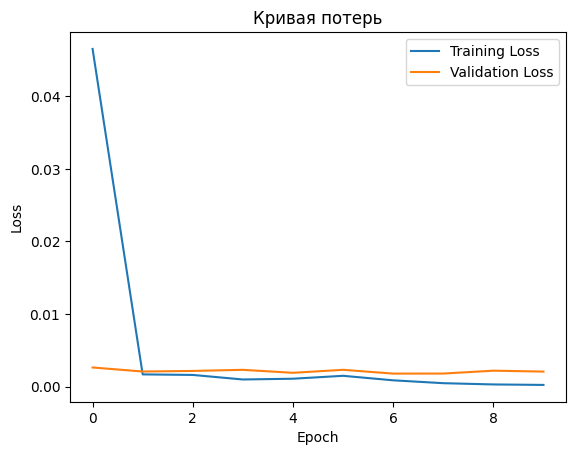

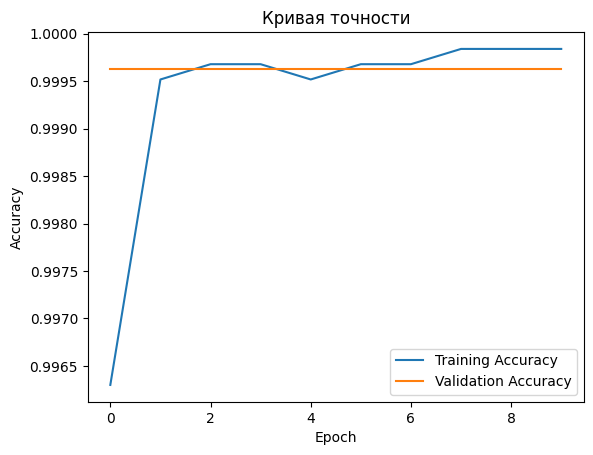

84/84s━━━━━━━━━━3ms/step━━9s 2/84  119ms/step━━━━━━━━━━━━━━━━━━━━ 0s 5ms/st ━━━━━━━━━━━━━━━━━22/84 3ms/step ━━━━━ ━━━━━━━━━━━━━━━━━━━━ ━━━━━━━━━━━━━━━ 0s 3ms/step0s 3ms/s45/84━━━━━━━━━━46/ ━━━━━━━━━━ 0s 3ms/step━━━━━━━━━━ ━━━━━━━━━━━ ━━━━━━━━━0s 0s 3ms/step 3ms/━━━━70/8 0s━━━━71/84 2ms/step ━━━━━━━━━━━━━━━━ ━━━━0s ━━━━━━━━━━━━━━ 2ms/step 72/840s  2ms/step 3ms/step━━━━━━━━━━━━━━━━━━━━ 0s 3ms/st ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/st ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


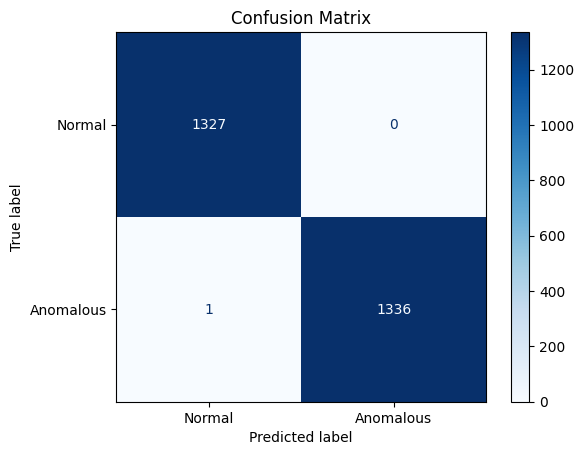

In [9]:
import matplotlib.pyplot as plt

# Построение кривой потерь
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Кривая потерь')
plt.show()

# Кривая точности
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Кривая точности')
plt.show()
# Используем обученную модель для предсказаний на тестовых данных
y_pred = (model.predict(X_test) > 0.5).astype("int32")  # Предсказания с порогом 0.5

# Построение матрицы ошибок
cm = confusion_matrix(y_test, y_pred)

# Визуализация с использованием ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Normal", "Anomalous"])
disp.plot(cmap=plt.cm.Blues)

plt.title('Confusion Matrix')
plt.show()

c:\Users\Slyexistence\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
49/49 2/49━━━━━━━━━━━━━━━━   42s/step - accuracy: 0.2656 - loss: 0.7378━━━━━━━━━━━━━━━━━━━━ 2s 60ms/step - accuracy: 0.3203 - loss: 0.725 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - accuracy: 0.4253 - loss: 0.704 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.5044 - loss: 0.684 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.5644 - loss: 0.665 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.6104 - loss: 0.647 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.6463 - loss: 0.628 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.6751 - loss: 0.609 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.6990 - loss: 0.590 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.7192 - loss: 0.571 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.7366 - loss: 0.552 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.7518 - loss: 0.534 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.7651 - loss: 0.516 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.7769 - loss: 0.500 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0

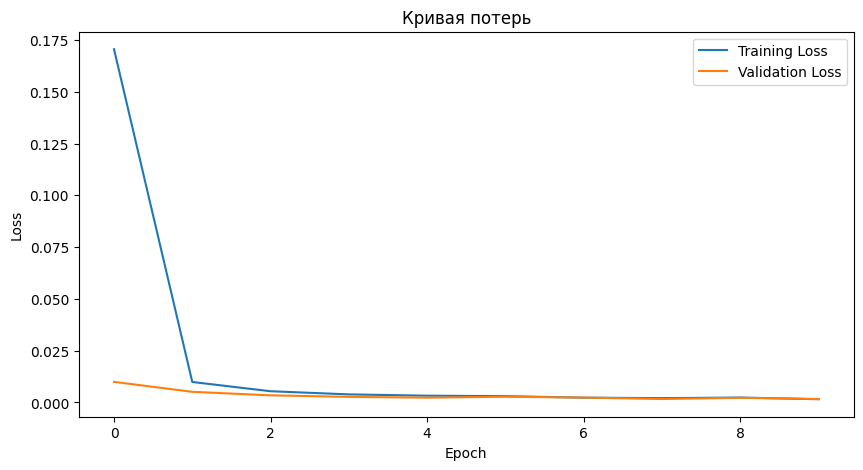

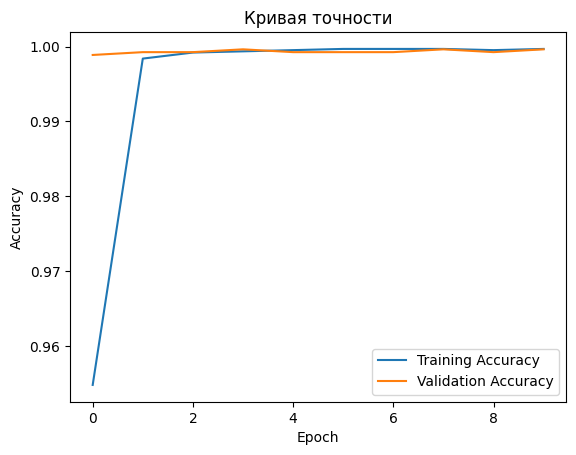

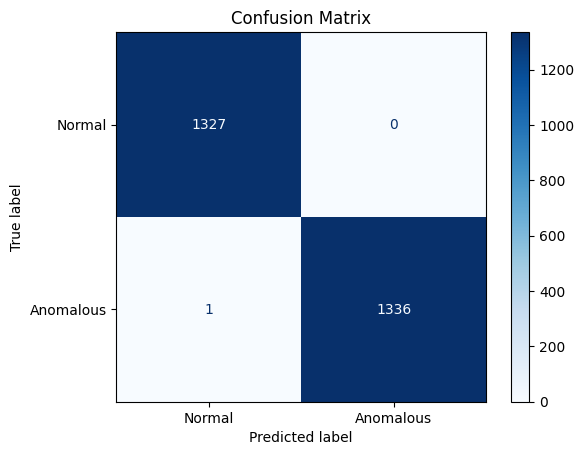

In [18]:
from tensorflow.keras.layers import Dropout

# Масштабирование данных
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(df.drop(columns=['label']))

# Формирование временных последовательностей
def create_sequences(data, labels, sequence_length):
    sequences = []
    sequence_labels = []
    for i in range(len(data) - sequence_length):
        sequences.append(data[i:i+sequence_length])
        sequence_labels.append(labels[i+sequence_length])
    return np.array(sequences), np.array(sequence_labels)

sequence_length = 40  # Длина последовательности
X, y = create_sequences(scaled_features, df['label'].values, sequence_length)

# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Определение весов для классов
class_weights = class_weight.compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train),
    y=y_train
)
class_weights_dict = dict(enumerate(class_weights))

# Создание модели RNN с Dropout
model = Sequential()
model.add(LSTM(64, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=False))
model.add(Dropout(0.5))  # Добавляем Dropout для отключения 20% нейронов
model.add(Dense(1, activation='sigmoid'))

# Компиляция модели
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Обучение модели с указанием весов классов
history = model.fit(X_train, y_train, epochs=10, batch_size=128, validation_data=(X_test, y_test), class_weight=class_weights_dict)

# Оценка модели
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Точность: {accuracy * 100:.2f}%")

# Визуализация графиков
plt.figure(figsize=(10,5))

# Построение кривой потерь
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Кривая потерь')
plt.show()

# Кривая точности
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Кривая точности')
plt.show()

# Визуализация с использованием ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Normal", "Anomalous"])
disp.plot(cmap=plt.cm.Blues)

plt.title('Confusion Matrix')
plt.show()



In [19]:
from sklearn.metrics import classification_report
from sklearn.metrics import (roc_auc_score, f1_score, 
                             confusion_matrix, roc_curve, auc)
y_train_pred = model.predict(X_train).ravel()
y_train_pred_class = (y_train_pred > 0.5).astype(int)

y_test_pred = model.predict(X_test).ravel()
y_test_pred_class = (y_test_pred > 0.5).astype(int)

print("=== TRAIN METRICS ===")
print(f"AUC: {roc_auc_score(y_train, y_train_pred):.3f}")
print(f"F1-Score: {f1_score(y_train, y_train_pred_class):.3f}")
print(classification_report(y_train, y_train_pred_class))

print("\n=== TEST METRICS ===")
print(f"AUC: {roc_auc_score(y_test, y_test_pred):.3f}")
print(f"F1-Score: {f1_score(y_test, y_test_pred_class):.3f}")
print(classification_report(y_test, y_test_pred_class))


194/194ep168/194━━━━━━━━━━━━ 33s 175ms/ste ━━━━━━━━━━━━━━━━━━━━ 10s 53ms/ste ━━━━━━━━━━━━━━━━━━━━   9/194 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/ste ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1s  9ms/step 1s 9ms/ste ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/st ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/st ━━━━━━━━━━━━━━━━━━1s  7ms/step━━━━━━━━━━━━━━━━━━━━ 1s 7ms/st ━━━━━━━━━━━━━━━━━━ 50/1941s 7ms/step ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/s ━━━━━━━━━━━━━━━━━━━━━ ━━━━━━━━━━━━━━ 0s 7ms/step━━━━━━━━━━━━━━━━━━━━ 0s 7ms/st ━━━━━  71/1940s 7ms/step ━━━━━━━━━━━━━━━━━━  ━━━━━━━━━━━━━━━━━━━━0s 0s 7ms/step 7ms/st ━━━━━━━━━━━━━━━━━━━ 83/194 6ms/step ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/st ━━━━━━━━━━━━━━━━━━ 0s 6ms/step━━━━━━━━━━━━━━━━━━━━ 0s 6ms/st ━━━━━━━━  ━━━━━━━━━━0s━━━━━━━━━━  6ms/st  6ms/step━━━━━━━━━━━━━━━━━━━━ 0s 6ms/st ━━━━━━━━━━━━━━━━━━0s116/194  6ms/step━━━━━━━━━━━━━━━━━━━━ 0s 6ms/st ━━━━━━━━━━━━━━━━━━125/1940s 6ms/step ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/st ━━━━━━━━━━━━━━━━━━━ 6ms/step135/194 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/st ━━━━━━━━━━━━━━━━━━0s145/194 

c:\Users\Slyexistence\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


ValueError: The filepath provided must end in `.keras` (Keras model format). Received: filepath=best_model.h5